# **AF 4- Transformadas geométricas y de Fourier**

*   Nelly Fernanda Torres ramírez 2014788
*   Leyanet Piedra Llanes 2011260


Profesor: Daniel Isaías López Páez  
Clase: Procesamiento Digital de Imágenes


# **Parte II - Práctica**

Preprocesamiento:

In [2]:
# Paso 1: Importación de librerías
import cv2 #procesamiento de imagenes
import numpy as np #cálculos numéricos
import matplotlib.pyplot as plt #matemáticas avanzadas
import urllib.request #descargar archivos desde internet

# Paso 2: Descargar la imagen desde GitHub
url_imagen = "https://github.com/dilp90/PDI/raw/main/Imagenes/colibri.jpg"
ruta_imagen = "colibri.jpg"
urllib.request.urlretrieve(url_imagen, ruta_imagen)

# Paso 3. Cargar la imagen en escala de grises
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Paso 4. Dimensiones de la imagen
alto, ancho = imagen.shape

Transformaciones geométricas:

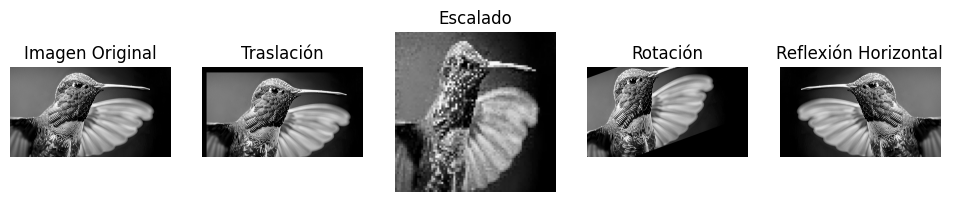

ANÁLISIS DE TRANSFORMACIONES GEOMÉTRICAS:
- Traslación: la imagen se desplaza sin cambiar su orientación.
- Escalado: se amplían los detalles de la imagen.
- Rotación: la imagen gira, lo que puede alterar el encuadre y la visibilidad.
- Reflexión: la imagen se invierte en forma de espejo.


In [3]:
# TRANSALCIÓN
# Paso 5. Definir traslación
tx, ty = 150, 180 #desplazamiento horizontal (tx) y vertical (ty)
M_translacion = np.float32([[1, 0, tx], [0, 1, ty]]) #se crea la matriz de transformación

# Paso 6. Aplicar traslación
imagen_trasladada = cv2.warpAffine(imagen, M_translacion, (ancho, alto))
#se aplica la matriz de traslación a la imagen original con el mismo ancho y alto

#---------------------------------------------------------------------------------------------------------#

# ESCALADO
# Paso 7. Definir escalado
hx = 80   #nuevo ancho
hy = 80   #nueva altura

# Paso 8. Aplicar escalado
imagen_escalada = cv2.resize(imagen, (hx, hy))
#se redimensiona la imagen original a las nuevas dimensiones (hx, hy)

#---------------------------------------------------------------------------------------------------------#

# ROTACIÓN
# Paso 9. Definir rotación
angulo = 20 #ángulo de rotación en grados (positivo: antihorario)
centro = (alto // 2, ancho // 2)  #centro de la imagen como punto de rotación
escala = 1  #sin cambios en el tamaño
M_rotacion = cv2.getRotationMatrix2D(centro, angulo, escala)
#se genera la matriz de rotación utilizando el centro, ángulo y escala

# Paso 10. Aplicar rotación
imagen_rotada = cv2.warpAffine(imagen, M_rotacion, (ancho, alto))
#se aplica la rotación a la imagen original usando la matriz de rotación y el tamaño original

#---------------------------------------------------------------------------------------------------------#

# REFLEXIÓN
# Paso 11. Aplicar y definir reflexión
imagen_flip_horizontal = cv2.flip(imagen, 1)
#se aplica una reflexión horizontal (espejo sobre eje vertical); el parámetro '1' indica flip horizontal

#---------------------------------------------------------------------------------------------------------#

# RESULTADOS
#Paso 12. Resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 5, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(imagen_trasladada, cmap='gray')
plt.title('Traslación')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(imagen_escalada, cmap='gray')
plt.title('Escalado')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(imagen_rotada, cmap='gray')
plt.title('Rotación')
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(imagen_flip_horizontal, cmap='gray')
plt.title('Reflexión Horizontal')
plt.axis("off")

plt.show()


print("ANÁLISIS DE TRANSFORMACIONES GEOMÉTRICAS:")
print("- Traslación: la imagen se desplaza sin cambiar su orientación.")
print("- Escalado: se amplían los detalles de la imagen.")
print("- Rotación: la imagen gira, lo que puede alterar el encuadre y la visibilidad.")
print("- Reflexión: la imagen se invierte en forma de espejo.")


Transformaciones frecuenciales:

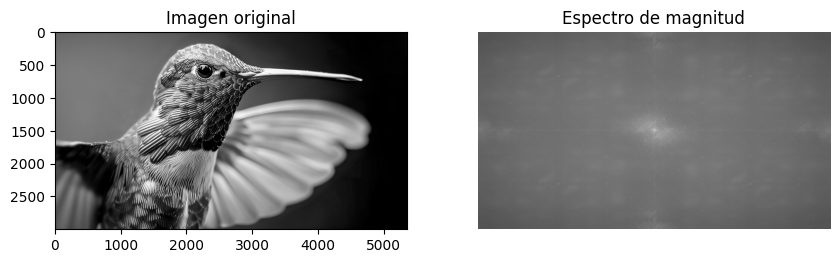

In [63]:
# TRANSFORMADA DE FOURIER
# Paso 13. Obtener la transformada de Fourier (compleja)
f = np.fft.fft2(imagen) #convierte la imagen del dominio espacial al frecuencial
fshift = np.fft.fftshift(f)  #centrar bajas frecuencia

# Paso 14. Calcular espectro de magnitud
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
#calcula el espectro de magnitud:
# - np.abs(fshift) obtiene la magnitud (módulo) de los valores complejos
# - se le suma 1 para evitar log(0)
# - aplica logaritmo para comprimir el rango dinámico
# - multiplica por 20 para escalar los valores


# Paso 15. Resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de frecuencias')

plt.show()

print("ANÁLISIS DEL ESPECTRO DE FRECUENCIAS:")
print("El centro del espectro contiene las bajas frecuencias, que representan las estructuras grandes o generales de la imagen")
print("Los bordes contienen las altas frecuencias, que corresponden a detalles finos y ruido.")

ELIMINACIÓN DE RUIDO MEDIANTE ENMASCARAMIENTO DE FRECUENCIA:

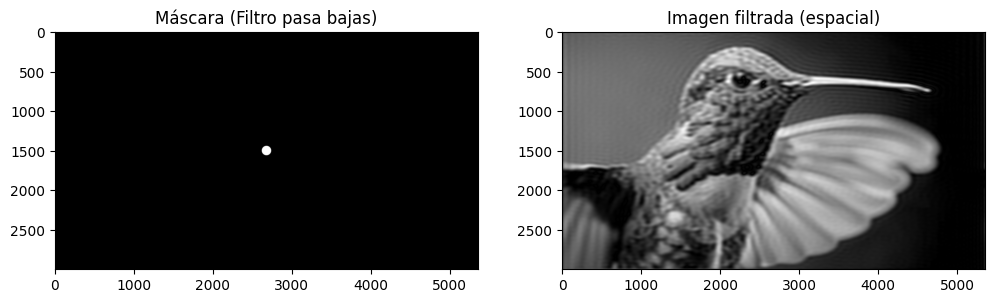

In [64]:
# FILTRO PASA BAJAS
# Paso 16. Crear un filtro (eliminar altas frecuencias)
rows, cols = imagen.shape #número de filas y columnas (alto y ancho)
crow, ccol = rows // 2 , cols // 2 #calcula el centro de la imagen (frecuencia cero)
r = 60  #radio del filtro pasa bajas

# Paso 17. Crear máscara circular
mask = np.zeros((rows, cols), np.uint8) #crea una máscara de ceros del tamaño de la img
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)
#dibuja un círculo blanco (valor 1) en el centro de la máscara con radio 'r'
#permite el paso de frecuencias bajas y bloquea las altas (zona fuera del círculo)

# Paso 18. Aplicar la máscara al espectro
fshift_filtered = fshift * mask
#se aplica el filtro, conserva las frecuencias dentro del círculo

# Paso 19. Transformada inversa
f_ishift = np.fft.ifftshift(fshift_filtered) #deshace el desplazamiento del centro
img_back = np.fft.ifft2(f_ishift) #aplica la TF Inversa para regresar al dominio espacial
img_back = np.abs(img_back) #toma el valor absoluto para obtener una imagen real


# Paso 20. Crear figuras para mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Máscara (Filtro pasa bajas)')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Imagen filtrada (espacial)')

plt.show()